In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

In [2]:
import tensorflow as tf
import keras
import os 
import time
#import cv2
import numpy as np
#import matplotlib.pyplot as plt
from keras import optimizers
import keras
import tensorflow as tf
import keras.backend as K
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
from keras.models import Sequential
from keras.regularizers import l2
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
#import matplotlib.pyplot as plt
#from tqdm import tqdm
from keras.utils import np_utils
#from imgaug import augmenters as iaa    
import itertools
%matplotlib inline
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
#from livelossplot import PlotLossesKeras
import os
#from classification_models.keras import Classifiers
# GPU test
from tensorflow.python.client import device_lib
np.random.seed(42)
from keras.models import load_model
# Print version
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.regularizers import l2
import os, sys
import scipy.misc
from glob import glob
import numpy as np
import random 
import shutil 
import keras
import time
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPool2D, Activation,Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.models import Sequential
from keras.applications.densenet import DenseNet121
from keras.models import load_model
from tensorflow.keras.optimizers import Adam
from keras import optimizers
import pickle
import sys
import cv2

import tensorflow as tf


np.random.seed(1)

In [3]:
train_dir = "C:/Users/Havoc/OneDrive/Documents/Corona Dataset Final/train"
valid_dir = "C:/Users/Havoc/OneDrive/Documents/Corona Dataset Final/test"

img_width, img_height = 224, 224 

# Using DenseNet201

In [4]:
conv_base = tf.keras.applications.DenseNet201(
    include_top=False,
    weights="imagenet",
    input_shape=(img_width, img_height, 3),
)


conv_base.summary()

74850304/74836368 [==============================] - 31s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                      

 ization)                                                                                         
                                                                                                  
 conv2_block4_0_relu (Activatio  (None, 56, 56, 160)  0          ['conv2_block4_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_0_bn (BatchNormal  (None, 28, 28, 160)  640        ['conv3_block1_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv3_block6_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)      

 conv3_block10_2_conv (Conv2D)  (None, 28, 28, 32)   36864       ['conv3_block10_1_relu[0][0]']   
                                                                                                  
 conv3_block10_concat (Concaten  (None, 28, 28, 448)  0          ['conv3_block9_concat[0][0]',    
 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 32)   36864       ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv4_block7_0_relu (Activatio  (None, 14, 14, 448)  0          ['conv4_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block11_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
          

                                                                                                  
 conv4_block15_concat (Concaten  (None, 14, 14, 736)  0          ['conv4_block14_concat[0][0]',   
 ate)                                                             'conv4_block15_2_conv[0][0]']   
                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block20_0_relu (Activati  (None, 14, 14, 864)  0          ['conv4_block20_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block24_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 14, 14, 1024  4096       ['conv4_block24_concat[0][0]']   
 lization)

 ate)                           )                                 'conv4_block28_2_conv[0][0]']   
                                                                                                  
 conv4_block29_0_bn (BatchNorma  (None, 14, 14, 1152  4608       ['conv4_block28_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block29_0_relu (Activati  (None, 14, 14, 1152  0          ['conv4_block29_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 14, 14, 128)  147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block33_1_conv (Conv2D)  (None, 14, 14, 128)  163840      ['conv4_block33_0_relu[0][0]']   
                                                                                                  
 conv4_block33_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block33_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block33_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block33_1_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block37_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block37_1_relu[0][0]']   
                                                                                                  
 conv4_block37_concat (Concaten  (None, 14, 14, 1440  0          ['conv4_block36_concat[0][0]',   
 ate)                           )                                 'conv4_block37_2_conv[0][0]']   
                                                                                                  
 conv4_block38_0_bn (BatchNorma  (None, 14, 14, 1440  5760       ['conv4_block37_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_blo

 conv4_block42_0_bn (BatchNorma  (None, 14, 14, 1568  6272       ['conv4_block41_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block42_0_relu (Activati  (None, 14, 14, 1568  0          ['conv4_block42_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block42_1_conv (Conv2D)  (None, 14, 14, 128)  200704      ['conv4_block42_0_relu[0][0]']   
                                                                                                  
 conv4_block42_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block42_1_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block46_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block46_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block46_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block46_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block46_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block46_1_relu[0][0]']   
                                                                                                  
 conv4_block46_concat (Concaten  (None, 14, 14, 1728  0          ['conv4_block45_concat[0][0]',   
 ate)     

 n)                                                                                               
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 128)    118784      ['conv5_block2_0_relu[0][0]']    
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 128)   512         ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_blo

 conv5_block6_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block6_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block6_1_relu[0][0]']    
                                                                                                  
 conv5_block6_concat (Concatena  (None, 7, 7, 1088)  0           ['conv5_block5_concat[0][0]',    
 te)                                                              'conv5_block6_2_conv[0][0]']    
                                                                                                  
 conv5_block7_0_bn (BatchNormal  (None, 7, 7, 1088)  4352        ['conv5_block6_concat[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv5_block11_0_bn (BatchNorma  (None, 7, 7, 1216)  4864        ['conv5_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block11_0_relu (Activati  (None, 7, 7, 1216)  0           ['conv5_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block11_1_conv (Conv2D)  (None, 7, 7, 128)    155648      ['conv5_block11_0_relu[0][0]']   
                                                                                                  
 conv5_block11_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block11_1_conv[0][0]']   
 lization)

 conv5_block15_1_conv (Conv2D)  (None, 7, 7, 128)    172032      ['conv5_block15_0_relu[0][0]']   
                                                                                                  
 conv5_block15_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block15_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block15_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block15_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block15_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block15_1_relu[0][0]']   
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block19_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block19_1_relu[0][0]']   
                                                                                                  
 conv5_block19_concat (Concaten  (None, 7, 7, 1504)  0           ['conv5_block18_concat[0][0]',   
 ate)                                                             'conv5_block19_2_conv[0][0]']   
                                                                                                  
 conv5_block20_0_bn (BatchNorma  (None, 7, 7, 1504)  6016        ['conv5_block19_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block20_0_relu (Activati  (None, 7, 7, 1504)  0           ['conv5_block20_0_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv5_block24_0_relu (Activati  (None, 7, 7, 1632)  0           ['conv5_block24_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block24_1_conv (Conv2D)  (None, 7, 7, 128)    208896      ['conv5_block24_0_relu[0][0]']   
                                                                                                  
 conv5_block24_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block24_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_blo

 conv5_block28_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block28_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block28_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block28_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block28_1_relu[0][0]']   
                                                                                                  
 conv5_block28_concat (Concaten  (None, 7, 7, 1792)  0           ['conv5_block27_concat[0][0]',   
 ate)                                                             'conv5_block28_2_conv[0][0]']   
          

                                                                                                  
 conv5_block32_concat (Concaten  (None, 7, 7, 1920)  0           ['conv5_block31_concat[0][0]',   
 ate)                                                             'conv5_block32_2_conv[0][0]']   
                                                                                                  
 bn (BatchNormalization)        (None, 7, 7, 1920)   7680        ['conv5_block32_concat[0][0]']   
                                                                                                  
 relu (Activation)              (None, 7, 7, 1920)   0           ['bn[0][0]']                     
                                                                                                  
Total params: 18,321,984
Trainable params: 18,092,928
Non-trainable params: 229,056
__________________________________________________________________________________________________


In [5]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator



datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 1920)) # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,3))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='categorical')
 
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(train_dir, 2623) 
validation_features, validation_labels = extract_features(valid_dir, 660)

Found 2623 images belonging to 3 classes.
Found 660 images belonging to 3 classes.


In [6]:
epochs = 40

model = Sequential()

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(7,7,1920)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 5, 5, 32)          552992    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2, 2, 32)          0         
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                      

In [7]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto')  


from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])


history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    callbacks=[checkpoint],
                    validation_data=(validation_features, validation_labels))

Epoch 1/40
82/82 [==============================] - ETA: 0s - loss: 0.3364 - acc: 0.8883
Epoch 1: val_acc improved from -inf to 0.92424, saving model to model-001-0.888296-0.924242.h5
82/82 [==============================] - 2s 24ms/step - loss: 0.3364 - acc: 0.8883 - val_loss: 0.2340 - val_acc: 0.9242
Epoch 2/40
82/82 [==============================] - ETA: 0s - loss: 0.1103 - acc: 0.9604
Epoch 2: val_acc improved from 0.92424 to 0.93030, saving model to model-002-0.960351-0.930303.h5
82/82 [==============================] - 2s 22ms/step - loss: 0.1103 - acc: 0.9604 - val_loss: 0.1988 - val_acc: 0.9303
Epoch 3/40
82/82 [==============================] - ETA: 0s - loss: 0.0683 - acc: 0.9783
Epoch 3: val_acc improved from 0.93030 to 0.93788, saving model to model-003-0.978269-0.937879.h5
82/82 [==============================] - 2s 21ms/step - loss: 0.0683 - acc: 0.9783 - val_loss: 0.2283 - val_acc: 0.9379
Epoch 4/40
82/82 [==============================] - ETA: 0s - loss: 0.0614 - acc: 

82/82 [==============================] - ETA: 0s - loss: 0.0131 - acc: 0.9958
Epoch 31: val_acc did not improve from 0.96061
82/82 [==============================] - 2s 21ms/step - loss: 0.0131 - acc: 0.9958 - val_loss: 0.1486 - val_acc: 0.9530
Epoch 32/40
82/82 [==============================] - ETA: 0s - loss: 0.0230 - acc: 0.9924
Epoch 32: val_acc did not improve from 0.96061
82/82 [==============================] - 2s 21ms/step - loss: 0.0230 - acc: 0.9924 - val_loss: 0.1906 - val_acc: 0.9424
Epoch 33/40
82/82 [==============================] - ETA: 0s - loss: 0.0163 - acc: 0.9939
Epoch 33: val_acc improved from 0.96061 to 0.96364, saving model to model-033-0.993900-0.963636.h5
82/82 [==============================] - 2s 22ms/step - loss: 0.0163 - acc: 0.9939 - val_loss: 0.1554 - val_acc: 0.9636
Epoch 34/40
82/82 [==============================] - ETA: 0s - loss: 0.0152 - acc: 0.9943
Epoch 34: val_acc did not improve from 0.96364
82/82 [==============================] - 2s 21ms/ste

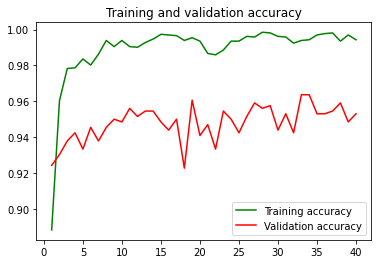

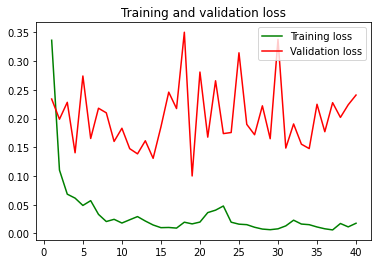

In [8]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']

val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()



plt.show()

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
prediction = model.predict(validation_features)

In [11]:
pred = np.argmax(prediction, axis=1)
# label
validation_labels = np.argmax(validation_labels, axis=1)

In [12]:
print(classification_report(validation_labels, pred, target_names = ['Covid','NonCovid','Pneumonia']))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00       220
    NonCovid       0.91      0.97      0.94       220
   Pneumonia       0.96      0.90      0.93       220

    accuracy                           0.95       660
   macro avg       0.95      0.95      0.95       660
weighted avg       0.95      0.95      0.95       660



# Using VGG 16

In [13]:
from keras.applications.vgg16 import VGG16
convolutional1_VGG16_base = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(img_width, img_height,3))


convolutional1_VGG16_base.summary()

58900480/58889256 [==============================] - 24s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                             

In [14]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

def extract_features(directory, sample_count):
  features = np.zeros(shape = (sample_count,7, 7, 512)) # equals to convolutional base
  labels = np.zeros(shape = (sample_count,3)) # as we have 3 class for labels 

  #process data
  generator = datagen.flow_from_directory(directory, target_size = (img_width, img_height),batch_size = batch_size, class_mode = 'categorical')
  
  #pass data into to convolutional base
  i = 0;
  for inputs_batch, labels_batch in generator:
    features_batch = convolutional1_VGG16_base.predict(inputs_batch)
    features[i * batch_size: (i + 1) * batch_size] = features_batch
    labels[i * batch_size: (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels
    
train_features, train_labels = extract_features(train_dir,2623)
test_features, test_labels = extract_features(valid_dir,660 )

Found 2623 images belonging to 3 classes.
Found 660 images belonging to 3 classes.


In [15]:
epochs = 40

model = Sequential()

model.add(GlobalAveragePooling2D(input_shape=(7, 7, 512)))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [16]:
# training the model
#collect the best weights
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto')  

from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    callbacks=[checkpoint],
                    validation_data=(test_features, test_labels))

Epoch 1/40
80/82 [============================>.] - ETA: 0s - loss: 0.9665 - acc: 0.6387
Epoch 1: val_acc improved from -inf to 0.83788, saving model to model-001-0.643919-0.837879.h5
82/82 [==============================] - 0s 3ms/step - loss: 0.9626 - acc: 0.6439 - val_loss: 0.8109 - val_acc: 0.8379
Epoch 2/40
45/82 [===============>..............] - ETA: 0s - loss: 0.7338 - acc: 0.8722
Epoch 2: val_acc did not improve from 0.83788
82/82 [==============================] - 0s 2ms/step - loss: 0.6985 - acc: 0.8662 - val_loss: 0.6558 - val_acc: 0.8348
Epoch 3/40
45/82 [===============>..............] - ETA: 0s - loss: 0.6001 - acc: 0.8764
Epoch 3: val_acc improved from 0.83788 to 0.85000, saving model to model-003-0.878002-0.850000.h5
82/82 [==============================] - 0s 2ms/step - loss: 0.5733 - acc: 0.8780 - val_loss: 0.5625 - val_acc: 0.8500
Epoch 4/40
71/82 [========================>.....] - ETA: 0s - loss: 0.5046 - acc: 0.8790
Epoch 4: val_acc improved from 0.85000 to 0.8606

Epoch 30/40
80/82 [============================>.] - ETA: 0s - loss: 0.2055 - acc: 0.9363
Epoch 30: val_acc improved from 0.91515 to 0.91667, saving model to model-030-0.935570-0.916667.h5
82/82 [==============================] - 0s 2ms/step - loss: 0.2061 - acc: 0.9356 - val_loss: 0.2492 - val_acc: 0.9167
Epoch 31/40
42/82 [==============>...............] - ETA: 0s - loss: 0.2190 - acc: 0.9286
Epoch 31: val_acc did not improve from 0.91667
82/82 [==============================] - 0s 2ms/step - loss: 0.2031 - acc: 0.9379 - val_loss: 0.2470 - val_acc: 0.9152
Epoch 32/40
43/82 [==============>...............] - ETA: 0s - loss: 0.1936 - acc: 0.9404
Epoch 32: val_acc improved from 0.91667 to 0.91818, saving model to model-032-0.936714-0.918182.h5
82/82 [==============================] - 0s 2ms/step - loss: 0.1997 - acc: 0.9367 - val_loss: 0.2472 - val_acc: 0.9182
Epoch 33/40
77/82 [===========================>..] - ETA: 0s - loss: 0.1960 - acc: 0.9399
Epoch 33: val_acc did not improve from

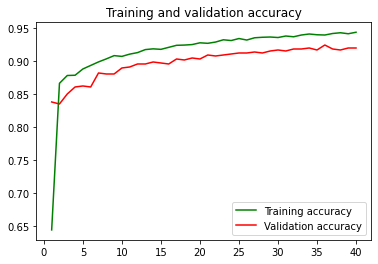

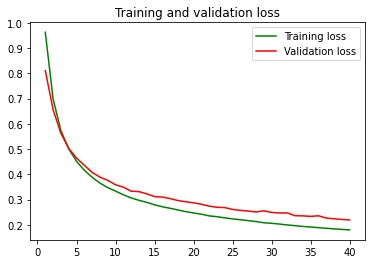

In [17]:
#plotting results
acc = history.history['acc']

val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()



plt.show()

In [18]:
prediction = model.predict(test_features)

In [19]:
import numpy as np
pred = np.argmax(prediction, axis=1)
# label
test_labels = np.argmax(test_labels, axis=1)

In [20]:
print(classification_report(test_labels, pred, target_names = ['Covid','NonCovid','Pneumonia']))

              precision    recall  f1-score   support

       Covid       0.95      0.97      0.96       220
    NonCovid       0.90      0.90      0.90       220
   Pneumonia       0.91      0.89      0.90       220

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660

